In [1]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *

%matplotlib inline

## 1. In words, describe how is the conditional probability P(vegetarian | dog owner) is theoretically different from the regular probability P(vegetarian)?

### The conditional probability is different because it is asking the probability of a person being a vegetarian if they are a dog owner. The sample frame is different and is of a specific group of people who are more likely to be vegetarian. 

## 2. Using the counts listed below, what is P(vegetarian)? P(vegetarian | dog owner)?

|            | Dog | No Dog |
|------------|-----|--------|
| Vegetarian | 50  | 100    |
| Carnivore  | 75  | 97     |


### P(vegetarian) =  150 / (75+97+150) = .47        
### p(vegetarian | dog owner) = 50/125 = .4

## 3. Probabilities can only be between 0 and 1, like the probability of getting heads in a coin toss. If we took the odds of getting a heads (p(heads)/p(tails)) what range of values can the odds take?

Use the python code below to explore what the odds could be

In [2]:
def odds(p, test = True):
    if p < 0 or p > 1:
        return("That's not a probability...")
    odds = p/(1-p)
    if test:
        print("The odds are " + str(odds) + ".")
    return(odds)


In [3]:
# the lowest a probability
odds(0)

The odds are 0.0.


0.0

In [4]:
# the highest a probability can be is 1, but for math reasons, let's go with 0.9999999999999999
odds(0.9999999999999999)

The odds are 9007199254740991.0.


9007199254740991.0

In [12]:
# look at a RANGE of probabilities and plot it

probabilities = np.linspace(start=0, stop=0.999, num=1000)
print(probabilities[1:10])
# print(np.where(probabilities == .5))
p_odds = [odds(p, False) for p in probabilities]
print(p_odds[1:10])

p_dataframe = pd.DataFrame({"p": probabilities, "odds": p_odds})

[0.001 0.002 0.003 0.004 0.005 0.006 0.007 0.008 0.009]
[0.001001001001001001, 0.002004008016032064, 0.0030090270812437314, 0.004016064257028113, 0.005025125628140704, 0.006036217303822938, 0.007049345417925478, 0.008064516129032258, 0.009081735620585268]


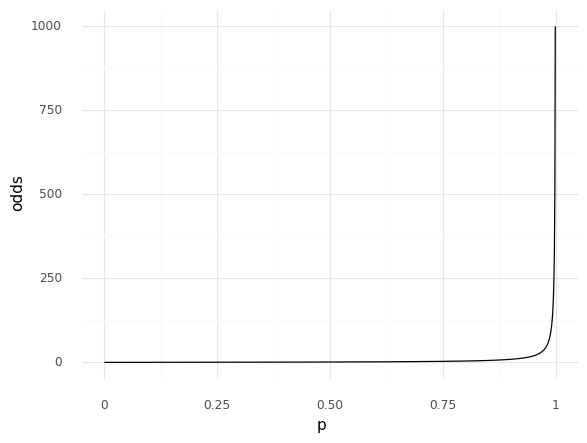

<ggplot: (8752253329189)>

In [7]:
# plot it

(ggplot(p_dataframe, aes(x = "p", y = "odds")) + geom_line() + theme_minimal())

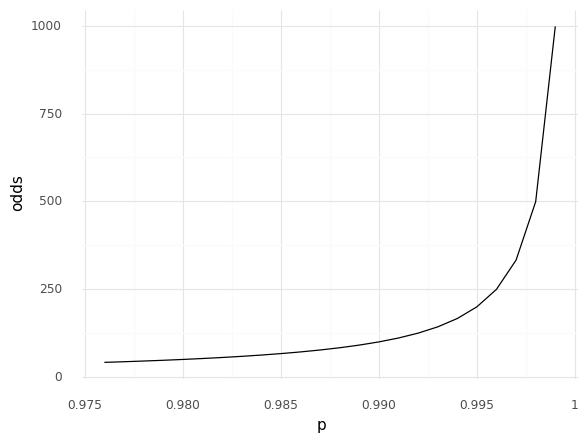

<ggplot: (8752253277813)>

In [8]:
nearOne = p_dataframe["p"] > 0.975 
(ggplot(p_dataframe.loc[nearOne,], aes(x = "p", y = "odds")) + geom_line() + theme_minimal())

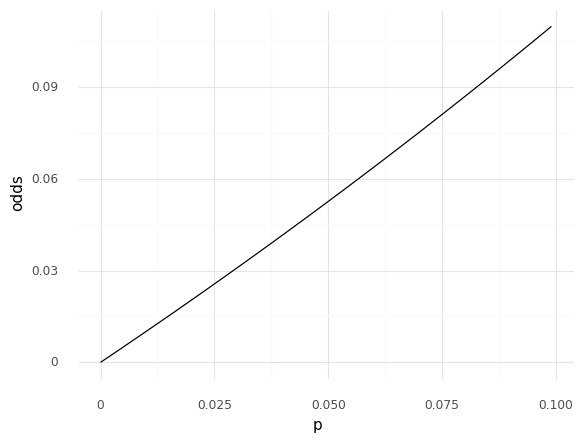

<ggplot: (8752253233517)>

In [9]:
nearZero = p_dataframe["p"]< 0.1
(ggplot(p_dataframe.loc[nearZero,], aes(x = "p", y = "odds")) + geom_line() + theme_minimal())

### from 0 to infinity ###

(What is the range of values odds can take?)

## 3. What are the odds when an event is equally likely to happen as not happen? What is the probability of an event when it is equally likely to happen as not happen?

### 1 ###

## 4. You have data from a survey. One of the questions asks students to pick one of the following responses: Strongly Disagree, Disagree, Neutral, Agree, Strongly Agree. What data type applies here, what are your justifications for that decision? 

### The variable is ordinal. The data type would be integers###

## 5. The derivative is a measure of the rate of change of a function. When should the derivative of a function be 0? Use the plots generated to confirm that this is the case.

set l equal to an x value for which the derivative of sin(x) should be 0 (use the first graph to visually assess where that point should be). The code will add a line to the two plots at x = l. Check that the derivative is 0 in the second plot.

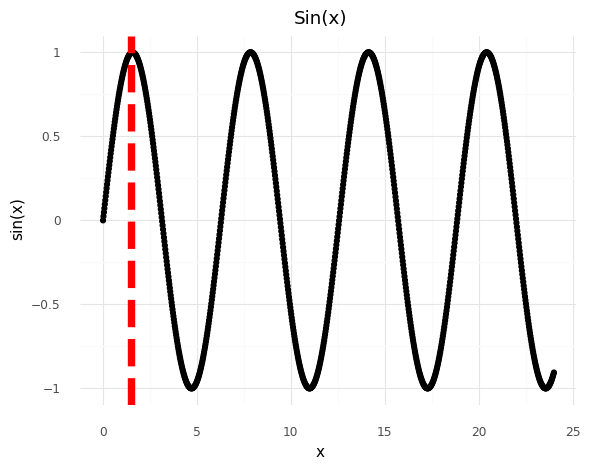

<ggplot: (8752253222549)>

In [28]:
import math

##############################
l= 1.467
##############################

x = np.linspace(0,24,num = 1000)
sin_x = np.array([math.sin(i) for i in x])


df = pd.DataFrame({"x": x, "sin(x)": sin_x, "sin(x)dx": np.gradient(sin_x)})
# nearZero = df["x"] < 1
            
(ggplot(df, aes(x = "x", y = "sin(x)")) +
      geom_point() +
 geom_vline(xintercept = l, color = "red", linetype = "dashed", size = 3) +
theme_minimal() +
labs(title = "Sin(x)"))


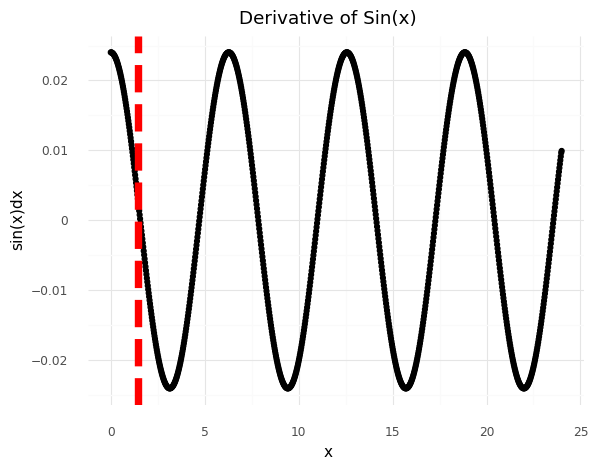

<ggplot: (8752253183081)>

In [14]:
(ggplot(df, aes(x = "x", y = "sin(x)dx")) +
      geom_point() +
  geom_vline(xintercept = l, color = "red", linetype = "dashed", size = 3) +
theme_minimal() +
labs(title = "Derivative of Sin(x)"))